Epoch 1/200
0s - loss: 2348.5896
Epoch 2/200
0s - loss: 2209.9703
Epoch 3/200
0s - loss: 2196.1873
Epoch 4/200
0s - loss: 2187.6342
Epoch 5/200
0s - loss: 2184.0577
Epoch 6/200
0s - loss: 2168.0988
Epoch 7/200
0s - loss: 2159.7105
Epoch 8/200
0s - loss: 2149.0097
Epoch 9/200
0s - loss: 2144.5121
Epoch 10/200
0s - loss: 2132.1826
Epoch 11/200
0s - loss: 2123.9219
Epoch 12/200
0s - loss: 2112.7927
Epoch 13/200
0s - loss: 2105.4097
Epoch 14/200
0s - loss: 2096.6448
Epoch 15/200
0s - loss: 2083.1027
Epoch 16/200
0s - loss: 2079.6138
Epoch 17/200
0s - loss: 2072.1998
Epoch 18/200
0s - loss: 2060.8387
Epoch 19/200
0s - loss: 2057.0247
Epoch 20/200
0s - loss: 2048.0046
Epoch 21/200
0s - loss: 2034.6237
Epoch 22/200
0s - loss: 2029.5771
Epoch 23/200
0s - loss: 2014.5679
Epoch 24/200
0s - loss: 2007.5194
Epoch 25/200
0s - loss: 2000.6088
Epoch 26/200
0s - loss: 1994.4277
Epoch 27/200
0s - loss: 1979.9202
Epoch 28/200
0s - loss: 1983.9436
Epoch 29/200
0s - loss: 1961.9459
Epoch 30/200
0s - loss:

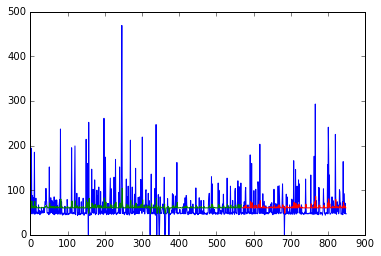

In [8]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt
import pandas
from keras.models import Sequential
from keras.layers import Dense

def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back-1):
        a = dataset[i : (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

dataframe = pandas.read_csv('e:/etc/test8/test.csv', usecols=[4], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

# print dataset

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# print(len(train), len(test))

look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=200, batch_size=2, verbose=2)

trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: ', testScore)

trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [268]:
history2 = {}
future2 = {}

with open("e:/etc/date/date.json","rb") as f:
    data = json.load(f)
#     print data
#     print json.JSONEncoder().encode(data)
#     for ele in data.get('20160101')[0:-1]:
#         print float(ele)
#     print data.keys()
#     datas = []
    for key in data:
#         print key , data.get(key)
#         datas.append({key : data.get(key)})
        if int(key) < 20160501:
            history2[key] = data.get(key)
        else:
            future2[key] = data.get(key)
#     print datas

print future2.get('20161002')

[6, u'1', 2, 2, 0, u'0', u'0', u'0']


In [269]:
import json , math , operator

history1 = {}
future1 = {}

# with open("e:/etc/date/date.json","rb") as f:
#     data = json.load(f)
# #     print data
# #     print json.JSONEncoder().encode(data)
# #     for ele in data.get('20160101')[0:-1]:
# #         print float(ele)
# #     print data.keys()
# #     datas = []
#     for key in data:
# #         print key , data.get(key)
# #         datas.append({key : data.get(key)})
#         if int(key) < 20160501:
#             history1[key] = data.get(key)
#         else:
#             future1[key] = data.get(key)
# #     print datas

# print future1.get('20160801')



# def euclideanDistance_try2(instance1, instance2, length):
#     distance = 0
#     for x in range(length , len(instance1) - 1):
#         if x == 6:
#             distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
#         else:
#             distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
#     return math.sqrt(distance)

def euclideanDistance_try3(instance1, instance2, length):
    distance = 0
    for x in range(length):
        if x == 0:
            distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
        else:
            distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
    return math.sqrt(distance)

# def getNeighbors_try3(trainingSet, testInstance, k):
#     distances = []
#     for ele in trainingSet:
#         dist = euclideanDistance_try2(testInstance , ele , 6)
#         distances.append((ele , dist))
#     distances.sort(key=operator.itemgetter(1))
#     neighbors = []
#     for x in range(k):
#         neighbors.append(distances[x][0])
#     return neighbors

def getNeighbors_try4(trainingSet, testInstance, k):
    distances = []
    for ele in trainingSet:
        dist = euclideanDistance_try3(testInstance , trainingSet.get(ele) , 6)
        distances.append((ele , dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def b0_2(line):
    if float(line[4]) == 0.0:
        roadTime = abs(float(line[1][3:7]) - int(line[2][3:7])) * 0.1 * (3600 / 80)
        line[4] = roadTime            
    return line

testInstance = [6, u'1', 2, 2, 0, u'0', u'0', u'0']

neighbors1 = getNeighbors_try4(history2 , testInstance , 7)

for ns in neighbors1:
    print ns        

20151101
20150531
20140824
20150201
20140216
20150510
20140525


In [257]:
import csv , traceback , re

day1 = []
day2 = []
day3 = []
day4 = []
day5 = []
day6 = []
day7 = []

# in xrange(5) ,
lista = [day1 , day2 , day3 , day4 , day5 , day6 , day7]
for x in xrange(len(neighbors1)):
    with open('e:/etc/test8/all/' + neighbors1[x] + 'w.csv' , 'rb') as f:
        for line in csv.reader(f):
            if re.match(r'01F.*' , line[1]) and re.match(r'01F.*' , line[2]):
                line = b0_2(line)
                lista[x].append(line)
                
for ele in lista:
    print len(ele)

outs = []

for x in xrange(len(day1)):
    all_t = float(day1[x][4]) + float(day2[x][4]) + float(day3[x][4]) + float(day4[x][4]) + float(day5[x][4]) + float(day6[x][4]) + float(day7[x][4])
#     print all_t
    avg_t = all_t / 7
    out = []
    sel_t = day1[x][0][11:]
    out.append(sel_t)
    out.append(day1[x][1])
    out.append(day1[x][2])
    out.append(day1[x][3])
    out.append(avg_t)
#     print out
    outs.append(out)

# print outs
    
with open('e:/etc/try8/test1.csv' , 'ab') as f:
    wr = csv.writer(f)
    wr.writerows(outs)
    
# for day in neighbors:
#     t = str()
#     with open('e:/etc/test8/all/' + day + 'w.csv' , 'rb') as f:
        

204480
201600
201600
201600
201600
201600
201600


IndexError: list index out of range

In [219]:
import json , math , operator , re , traceback , csv
from datetime import datetime , date

# def euclideanDistance_try2(instance1, instance2, length):
#     distance = 0
#     for x in range(length , len(instance1) - 1):
#         if x == 6:
#             distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
#         else:
#             distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
#     return math.sqrt(distance)

def euclideanDistance_try3(instance1, instance2, length):
    distance = 0
    for x in range(length):
        if x == 0:
            distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
        else:
            distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
    return math.sqrt(distance)

# def getNeighbors_try3(trainingSet, testInstance, k):
#     distances = []
#     for ele in trainingSet:
#         dist = euclideanDistance_try2(testInstance , ele , 6)
#         distances.append((ele , dist))
#     distances.sort(key=operator.itemgetter(1))
#     neighbors = []
#     for x in range(k):
#         neighbors.append(distances[x][0])
#     return neighbors

def getNeighbors_try4(trainingSet, testInstance, k):
    distances = []
    for ele in trainingSet:
        dist = euclideanDistance_try3(testInstance , trainingSet.get(ele) , 6)
        distances.append((ele , dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def b0_2(line):
    if float(line[4]) == 0.0:
        roadTime = abs(float(line[1][3:7]) - int(line[2][3:7])) * 0.1 * (3600 / 80)
        line[4] = roadTime            
    return line

time_s = datetime.now()

history = {}
future = {}

with open("e:/etc/date/date.json","rb") as f:
    data = json.load(f)
#     print data
#     print json.JSONEncoder().encode(data)
#     for ele in data.get('20160101')[0:-1]:
#         print float(ele)
#     print data.keys()
#     datas = []
    for key in data:
#         print key , data.get(key)
#         datas.append({key : data.get(key)})
        if int(key) < 20160501:
            history[key] = data.get(key)
        else:
            future[key] = data.get(key)
#     print datas

# print dic

# testInstance = ['3','1','4','1','3','0','0']

for key in future:
    if int(key) >= 20160801 and int(key) < 20161101:
        testInstance = future.get(key)

        neighbors = getNeighbors_try4(history , testInstance , 7)

        day1 = []
        day2 = []
        day3 = []
        day4 = []
        day5 = []
        day6 = []
        day7 = []

        # in xrange(5) ,
        lista = [day1 , day2 , day3 , day4 , day5 , day6 , day7]
        for x in xrange(len(neighbors)):
            with open('e:/etc/test8/all/' + neighbors[x] + 'w.csv' , 'rb') as f:
                for line in csv.reader(f):
                    if re.match(r'01F.*' , line[1]) and re.match(r'01F.*' , line[2]):
                        line = b0_2(line)
                        lista[x].append(line)

        # print day2

        outs = []

        for x in xrange(len(day1)):
            all_t = float(day1[x][4]) + float(day2[x][4]) + float(day3[x][4]) + float(day4[x][4]) + float(day5[x][4]) + float(day6[x][4]) + float(day7[x][4])
        #     print all_t
            avg_t = all_t / 7
            out = []
            sel_t = day1[x][0][11:]
            out.append(sel_t)
            out.append(day1[x][1])
            out.append(day1[x][2])
            out.append(day1[x][3])
        #     print out
            out.append(avg_t)
        #     print out
            outs.append(out)

#         print outs

        with open('e:/etc/try8/' + key + '.csv' , 'ab') as f:
            wr = csv.writer(f)
            wr.writerows(outs)
        
        print datetime.now() - time_s

0:00:12.971000
0:00:25.866000


IndexError: list index out of range

In [158]:
lista = [1,2,3,4,5]
listb = [6,7,8,9,10]

# for x in lista , listb:
for y in xrange(len(lista)):
    all_tt = int(lista[y]) + int(listb[y])
    print str(y) + ' : ' + str(all_tt)

0 : 7
1 : 9
2 : 11
3 : 13
4 : 15


In [213]:
import csv , os , re , math , operator , traceback
from datetime import datetime , date

def euclideanDistance_try2(instance1, instance2, length):
    distance = 0
    for x in range(length , len(instance1) - 1):
        if x == 6:
            distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
        else:
            distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
    return math.sqrt(distance)

def getNeighbors_try3(trainingSet, testInstance, k):
    distances = []
    for ele in trainingSet:
#         dist = euclideanDistance_try2(testInstance , ele , 6)
#         distances.append((ele , dist))
        if ele[4] != '0' and ele[4] != '0.0':
            dist = euclideanDistance_try2(testInstance , ele , 6)
            distances.append((ele , dist))
    print distances
    distances.sort(key=operator.itemgetter(1))
    print '--------------------------------------------------'
    print distances
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
#         neighbors.append(distances[x][1])
#     x = 0
#     while(len(neighbors) != k):
#         if distances[x][0][4] == '0' or distances[x][0][4] == '0.0':
#             x += 1
#             continue
#         else:
#             neighbors.append(distances[x][0])
#             x += 1
    return neighbors

def b0_2(line):

    if float(line[4]) == 0.0:
        roadTime = abs(float(line[1][3:7]) - int(line[2][3:7])) * 0.1 * (3600 / 80)
        line[4] = roadTime
            
    return line

timestart = datetime.now()

path = 'e:/etc/test6/'
path2 = 'e:/etc/predict/20160609/'

trdata = []

with open('e:/etc/test6/0000.csv','rb') as f:
    for line in csv.reader(f):
        if line[1] == '01F0017N' and line[2] == '01F0005N' and line[3] == '31':
            trdata.append(line)

trainSet = trdata
testInstance = ['2016/06/08 00:00', '01F0017N', '01F0005N', '31', '45', '22', '2', '0', '-1', '0', '-1', '1', '0', '0']
neighbors = getNeighbors_try3(trainSet , testInstance , 7)

for ele in neighbors:
    print ele

outputfile = ''

# try:
#     for dirPath, dirNames, fileNames in os.walk(path):
#         for f in fileNames:
#             outputs = []
#             trdata = []
#             with open(os.path.join(dirPath , f) , 'rb') as f2:  # All Data 288
#                 for line in csv.reader(f2):
#                     if re.match(r'\d{2}\w{1}[^a-zA-Z]\d*' , line[1]) and re.match(r'\d{2}F[^a-zA-Z]\d*' , line[2]):
# #                         print line
#                         line = b0_2(line)
#                         trdata.append(line)
#             with open((path2 + f) , 'rb') as f3:  # One Day 288
#                 for line2 in csv.reader(f3):
#                     traindata = []
#                     for ele in trdata:
#                         if ele[1] == line2[1] and ele[2] == line2[2] and ele[3] == line2[3]:
#                             traindata.append(ele)

#                     trainSet = traindata

#                     neighbors = getNeighbors_try3(trainSet , line2 , 7)

[(['2016/01/01 00:00', '01F0017N', '01F0005N', '31', '137', '26', '4', '1', '3', '1', '2', '0', '0', '\xe5\x85\x83\xe6\x97\xa6'], 5.301991240195622), (['2016/01/02 00:00', '01F0017N', '01F0005N', '31', '47', '44', '5', '1', '3', '2', '1', '0', '0', '0'], 5.123475382979799), (['2016/01/03 00:00', '01F0017N', '01F0005N', '31', '56', '53', '6', '1', '3', '3', '0', '0', '0', '0'], 5.333333333333333), (['2016/01/04 00:00', '01F0017N', '01F0005N', '31', '46', '29', '0', '0', '-1', '0', '-1', '0', '1', '0'], 1.4529663145135578), (['2016/01/05 00:00', '01F0017N', '01F0005N', '31', '44', '29', '1', '0', '-1', '0', '-1', '0', '0', '0'], 1.0137937550497031), (['2016/01/06 00:00', '01F0017N', '01F0005N', '31', '43', '20', '2', '0', '-1', '0', '-1', '0', '0', '0'], 1.0), (['2016/01/07 00:00', '01F0017N', '01F0005N', '31', '45', '22', '3', '0', '-1', '0', '-1', '0', '0', '0'], 1.0137937550497034), (['2016/01/08 00:00', '01F0017N', '01F0005N', '31', '44', '26', '4', '0', '-1', '0', '-1', '1', '0', '0

In [175]:
with open('e:/etc/test6/0000.csv','rb') as f:
    for line in csv.reader(f):
        if line[0] == '2015/06/18 00:00' and line[3] == '31':
            print line

['2015/06/18 00:00', '01F0017N', '01F0005N', '31', '173', '19', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '01F0029N', '01F0017N', '31', '50', '40', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '01F0005S', '01F0017S', '31', '48', '30', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '01F0061N', '01F0029N', '31', '119', '48', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '01F0017S', '01F0029S', '31', '47', '31', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '01F0099N', '01F0061N', '31', '140', '63', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '01F0029S', '01F0061S', '31', '123', '27', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '03F0006S', '01F0061S', '31', '293', '2', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '03F0054N', '01F0061S', '31', '0', '0', '3', '0', '-1', '0', '-1', '1', '0', '0']
['2015/06/18 00:00', '01F0147N', '01F0099N', '31', '1

In [218]:
import collections

def euclideanDistance_try4(instance1, instance2, length):
    distance = 0
    for x in range(length):
        if x == 0:
            distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
        else:
            distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
    return math.sqrt(distance)

def getNeighbors_try5(trainingSet, testInstance, k):
    distances = []
    for ele in trainingSet:
        dist = euclideanDistance_try4(testInstance , trainingSet.get(ele) , 6)
        distances.append((ele , dist))
    print distances
    distances.sort(key=operator.itemgetter(1))
    print '---------------------------------------------------------------------------------------------------------------------'
    print distances
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

sd = collections.OrderedDict(sorted(history.items()))
# sd2 = sorted(history.keys())

# print sd
# print sd2

testInstance = ['2', '0', '-1', '0', '-1', '1', '0', '0']

neighbors = getNeighbors_try5(sd , testInstance , 7)
for ele in neighbors:
    print ele

print "-------------------------------------------------------------------------------------------------------------------------"
    
history2 = {} 

for key in sorted(history.keys(),reverse=True):
    history2[key] = history.get(key)
    
neighbors = getNeighbors_try5(history2 , testInstance , 7)
for ele in neighbors:
    print ele

[(u'20140101', 2.8284271247461903), (u'20140102', 1.0137937550497034), (u'20140103', 0.33333333333333337), (u'20140104', 4.031128874149275), (u'20140105', 4.055175020198813), (u'20140106', 1.0540925533894598), (u'20140107', 1.0137937550497031), (u'20140108', 1.0), (u'20140109', 1.0137937550497034), (u'20140110', 0.33333333333333337), (u'20140111', 4.031128874149275), (u'20140112', 4.055175020198813), (u'20140113', 1.0540925533894598), (u'20140114', 1.0137937550497031), (u'20140115', 1.0), (u'20140116', 1.0137937550497034), (u'20140117', 0.33333333333333337), (u'20140118', 4.031128874149275), (u'20140119', 4.055175020198813), (u'20140120', 1.0540925533894598), (u'20140121', 1.0137937550497031), (u'20140122', 1.0), (u'20140123', 1.0137937550497034), (u'20140124', 0.33333333333333337), (u'20140125', 4.031128874149275), (u'20140126', 4.055175020198813), (u'20140127', 1.0540925533894598), (u'20140128', 1.0137937550497031), (u'20140129', 0.0), (u'20140130', 9.38231196335838), (u'20140131', 8

In [182]:
def euclideanDistance_try3(instance1, instance2, length):
    distance = 0
    for x in range(length):
        if x == 0:
            distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
        else:
            distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
    return math.sqrt(distance)

instance1 = future.get('20160608')
instance2 = history.get('20150618')

print euclideanDistance_try3(instance1, instance2, 6)

0.166666666667


In [185]:
a = [['a',10],['b',0],['c',91],['d',5],['e',-4]]
a.sort(key=operator.itemgetter(1))
b = [['a',10],['b',0],['c',91],['d',0],['e',-4]]
b.sort(key=operator.itemgetter(1))
c = [['a',10],['d',0],['c',91],['b',0],['e',-4]]
c.sort(key=operator.itemgetter(1))
print a
print b
print c

[['e', -4], ['b', 0], ['d', 5], ['a', 10], ['c', 91]]
[['e', -4], ['b', 0], ['d', 0], ['a', 10], ['c', 91]]
[['e', -4], ['d', 0], ['b', 0], ['a', 10], ['c', 91]]


In [220]:
import json , math , operator , re , traceback , csv
from datetime import datetime , date

def euclideanDistance_try3(instance1, instance2, length):
    distance = 0
    for x in range(length):
        if x == 0:
            distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
        else:
            distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
    return math.sqrt(distance)

def getNeighbors_try4(trainingSet, testInstance, k):
    distances = []
    for ele in trainingSet:
        dist = euclideanDistance_try3(testInstance , trainingSet.get(ele) , 6)
        distances.append((ele , dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def b0_2(line):
    if float(line[4]) == 0.0:
        roadTime = abs(float(line[1][3:7]) - int(line[2][3:7])) * 0.1 * (3600 / 80)
        line[4] = roadTime            
    return line

time_s = datetime.now()

history = {}
future = {}

with open("e:/etc/date/date.json","rb") as f:
    data = json.load(f)
    for key in data:
        if int(key) < 20160501:
            history[key] = data.get(key)
        else:
            future[key] = data.get(key)
#     print datas

for key in future:
    try:
        if int(key) >= 20160801 and int(key) < 20161101:
            testInstance = future.get(key)

            neighbors = getNeighbors_try4(history , testInstance , 7)

            day1 = []
            day2 = []
            day3 = []
            day4 = []
            day5 = []
            day6 = []
            day7 = []

            lista = [day1 , day2 , day3 , day4 , day5 , day6 , day7]
            for x in xrange(len(neighbors)):
                with open('e:/etc/test8/all/' + neighbors[x] + 'w.csv' , 'rb') as f:
                    for line in csv.reader(f):
                        if re.match(r'01F.*' , line[1]) and re.match(r'01F.*' , line[2]):
                            line = b0_2(line)
                            lista[x].append(line)

            outs = []

            for x in xrange(len(day1)):
                all_t = float(day1[x][4]) + float(day2[x][4]) + float(day3[x][4]) + float(day4[x][4]) + float(day5[x][4]) + float(day6[x][4]) + float(day7[x][4])
            #     print all_t
                avg_t = all_t / 7
                out = []
                sel_t = day1[x][0][11:]
                out.append(sel_t)
                out.append(day1[x][1])
                out.append(day1[x][2])
                out.append(day1[x][3])
            #     print out
                out.append(avg_t)
            #     print out
                outs.append(out)

            with open('e:/etc/try8/' + key + '.csv' , 'ab') as f:
                wr = csv.writer(f)
                wr.writerows(outs)

            print datetime.now() - time_s
    except:
        print key

0:00:12.534000
0:00:25.012000
20160904
0:00:49.462000
20160902
0:01:15.072000
0:01:27.745000
0:01:40.128000
20160909
0:02:04.700000
0:02:17.322000
0:02:29.635000
20161016
0:02:53.887000
20161014
0:03:18.431000
0:03:30.827000
0:03:43.375000
0:03:56.251000
0:04:08.724000
0:04:21.179000
0:04:33.677000
0:04:45.968000
20161023
0:05:10.213000
20161021
0:05:34.761000
0:05:47.036000
0:05:59.397000
0:06:11.718000
0:06:24.339000
20161028
0:06:48.570000
0:07:01.131000
0:07:13.597000
20160821
0:07:37.910000
0:07:50.460000
0:08:03.037000
20160828
0:08:27.425000
20161030
0:08:51.664000
0:09:04.015000
0:09:16.540000
0:09:28.861000
0:09:41.437000
20160925
20160923
0:10:18.072000
0:10:30.640000
0:10:43.105000
0:10:55.670000
0:11:08.020000
0:11:20.477000
0:11:32.664000
0:11:45.220000
0:11:57.744000
0:12:10.041000
0:12:22.322000
0:12:34.672000
20160819
0:12:59.604000
0:13:12.245000
0:13:25.124000
0:13:37.836000
0:13:50.386000
0:14:02.794000
20160812
0:14:28.269000
20160930
20160814
0:15:05.526000
0:15:18

In [6]:
import json , math , operator , re , traceback , csv
from datetime import datetime , date

def euclideanDistance_try3(instance1, instance2, length):
    distance = 0
    for x in range(length):
        if x == 0:
            distance += pow(((float(instance1[x]) / 6 + 0.167) - (float(instance2[x]) / 6 + 0.167)) , 2)
        else:
            distance += pow((int(instance1[x]) - int(instance2[x])) , 2)
    return math.sqrt(distance)

def getNeighbors_try4(trainingSet, testInstance, k):
    distances = []
    for ele in trainingSet:
        dist = euclideanDistance_try3(testInstance , trainingSet.get(ele) , 6)
        distances.append((ele , dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
#     x = 0
#     while(len(neighbors) != k):
#         if int(distances[x][0]) > 20151001: # or int(distances[x][0]) == 20150531
#             x += 1
#             continue
#         else:
#             neighbors.append(distances[x][0])
#             x += 1
#     for ele in neighbors:
#         print ele
    return neighbors

def b0_2(line):
    if float(line[4]) == 0.0:
        roadTime = abs(float(line[1][3:7]) - int(line[2][3:7])) * 0.1 * (3600 / 80)
        line[4] = roadTime            
    return line

time_s = datetime.now()

history = {}
future = {}

with open("e:/etc/date/date.json","rb") as f:
    data = json.load(f)
    for key in data:
        if int(key) < 20160501:
            history[key] = data.get(key)
        else:
            future[key] = data.get(key)
#     print datas

datelist = [20160820,20160821,20160822,20160823,20160824,20160825,20160826,20160827,20160828,20160903,20160904,20160915,20160916,20160917,20160918,20160919,20160920
           ,20160921,20160922,20160923,20160924,20160925]

for key in future:
    try:
        if int(key) >= 20160820 and int(key) < 20160829: # >= 20160915 and int(key) < 20160926
            testInstance = future.get(key)

            neighbors = getNeighbors_try4(history , testInstance , 7)
            
#             for ele in neighbors:
#                 print ele
#             print 'result : '

            day1 = []
            day2 = []
            day3 = []
            day4 = []
            day5 = []
            day6 = []
            day7 = []

            lista = [day1 , day2 , day3 , day4 , day5 , day6 , day7]
            for x in xrange(len(neighbors)):
                with open('e:/etc/test8/all3/' + neighbors[x] + 'w.csv' , 'rb') as f:
                    for line in csv.reader(f):
                        if re.match(r'05F0.*' , line[1]) and re.match(r'05F0.*' , line[2]):
                            line = b0_2(line)
                            lista[x].append(line)

            outs = []

            for x in xrange(len(day1)):
                all_t = float(day1[x][4]) + float(day2[x][4]) + float(day3[x][4]) + float(day4[x][4]) + float(day5[x][4]) + float(day6[x][4]) + float(day7[x][4])
            #     print all_t
                avg_t = all_t / 7
                all_f = float(day1[x][5]) + float(day2[x][5]) + float(day3[x][5]) + float(day4[x][5]) + float(day5[x][5]) + float(day6[x][5]) + float(day7[x][5])
            #     print all_t
                avg_f = all_f / 7
                out = []
                sel_t = day1[x][0][11:]
                out.append(sel_t)
                out.append(day1[x][1])
                out.append(day1[x][2])
                out.append(day1[x][3])
            #     print out
                out.append(avg_t)
                out.append(avg_f)
            #     print out
                outs.append(out)

            with open('e:/etc/try8/fk/' + key + '.csv' , 'ab') as f:
                wr = csv.writer(f)
                wr.writerows(outs)

            print datetime.now() - time_s
#             print '------------' + key + '--------------'
#             print '--------------------------------------------------------------------------------------------------------------------------------------------------'
    except:

        print key , traceback.print_exc()

0:00:07.463000
0:00:14.668000
0:00:20.789000
0:00:26.872000
0:00:34.123000
0:00:40.220000
0:00:46.315000
0:00:53.151000
0:00:59.683000


In [17]:
ox = [20150103,20150405,20160404,20140405,20160102,20150228,20140301]

for ele in ox:
    with open('e:/etc/test8/all3/' + str(ele) + 'w.csv' , 'rb') as f:
        a = []
        for line in csv.reader(f):
#             if re.match(r'01F.*' , line[1]) and re.match(r'01F.*' , line[2]):
#                 a.append(line)
              if re.match(r'03F.*' , line[1]) and re.match(r'03F.*' , line[2]):
                a.append(line)
#               if re.match(r'05F0.*' , line[1]) and re.match(r'05F0.*' , line[2]):
#                 a.append(line)
        print len(a)

218880
218880
224640
216000
218880
218880
216000


In [1]:
import os , csv , traceback

path = 'e:/etc/test8/alll/'

for times in os.listdir(path):
    try:
#     print times
        ele = []

        with open(path + times , 'rb') as f:
            for line in csv.reader(f):
                ele.append(line)

        with open('e:/etc/test8/tt/' + times , 'ab') as f:
            for x in xrange(len(ele)):
                if ele[x][1] == '01F2866N':
                    continue
                elif ele[x][1] == '01F2930N' and ele[x][2] == '01F02866N':
                    fi = []
                    bt = float(ele[x-2][4])
                    ft = float(ele[x][4]) + bt
                    fi.append(ele[x][0])
                    fi.append(ele[x][1])
                    fi.append(ele[x-2][2])
                    fi.append(ele[x][3])
                    fi.append(ft)
                    fi.append(ele[x][5])
                    wr = csv.writer(f)
                    wr.writerow(fi)
                elif ele[x][1] == '01F2827S':
                    fi = []
                    bt = float(ele[x+2][4])
                    ft = float(ele[x][4]) + bt
                    fi.append(ele[x][0])
                    fi.append(ele[x][1])
                    fi.append(ele[x][3])
                    fi.append(ele[x+2][2])
                    fi.append(ft)
                    fi.append(ele[x][5])
                    wr = csv.writer(f)
                    wr.writerow(fi)
                elif ele[x][1] == '01F2866S':
                    continue
                elif ele[x][1] == '03F0498N':
                    continue
                elif ele[x][1] == '03F0525N' and ele[x][2] == '03F0498N':
                    fi = []
                    bt = float(ele[x-2][4])
                    ft = float(ele[x][4]) + bt
                    fi.append(ele[x][0])
                    fi.append(ele[x][1])
                    fi.append(ele[x-2][2])
                    fi.append(ele[x][3])
                    fi.append(ft)
                    fi.append(ele[x][5])
                    wr = csv.writer(f)
                    wr.writerow(fi)
                else:
                    wr = csv.writer(f)
                    wr.writerow(ele[x])
    except:
        print times , traceback.print_exc()
                
# wr = csv.writer(f)
# wr.writerows(outputs)

20150701w.csv None


Traceback (most recent call last):
  File "<ipython-input-1-fd11c8b1bd5c>", line 30, in <module>
    bt = int(ele[x+2][4])
ValueError: invalid literal for int() with base 10: '940.0'


In [5]:
import os , re , csv , traceback

path = 'e:/etc/test8/x1/'

for times in os.listdir(path):
    try:
#     print times
        ele = []

        with open(path + times , 'rb') as f:
            for line in csv.reader(f):
                ele.append(line)

        with open('e:/etc/test8/x2/' + times , 'ab') as f:
            w1 = []
            w3 = []
            w5 = []
            
            for line in ele:
                if re.match(r'01F.*' , line[1]) and re.match(r'01F.*' , line[2]):
                    w1.append(line)
                elif re.match(r'03F.*' , line[1]) and re.match(r'03F.*' , line[2]):
                    w3.append(line)
                elif re.match(r'05F0.*' , line[1]) and re.match(r'05F0.*' , line[2]):
                    w5.append(line)
                else:
                    continue
            
            for x in xrange(len(w1)):
                if w1[x][1] == '01F2866N':
                    continue
                elif w1[x][1] == '01F2930N' and w1[x][2] == '01F2866N':
                    fi = []
                    bt = float(w1[x - 10][4])
                    ft = float(w1[x][4]) + bt
                    fi.append(w1[x][0])
                    fi.append(w1[x][1])
                    fi.append(w1[x - 10][2])
                    fi.append(w1[x][3])
                    fi.append(ft)
                    fi.append(w1[x][5])
                    wr = csv.writer(f)
                    wr.writerow(fi)
                elif w1[x][1] == '01F2827S':
                    fi = []
                    bt = float(w1[x + 10][4])
                    ft = float(w1[x][4]) + bt
                    fi.append(w1[x][0])
                    fi.append(w1[x][1])
                    fi.append(w1[x + 10][2])
                    fi.append(w1[x][3])
                    fi.append(ft)
                    fi.append(w1[x][5])
                    wr = csv.writer(f)
                    wr.writerow(fi)
                elif w1[x][1] == '01F2866S':
                    continue
                else:
                    wr = csv.writer(f)
                    wr.writerow(w1[x])
            for x in xrange(len(w3)):
                if w3[x][1] == '03F0498N':
                    continue
                elif w3[x][1] == '03F0525N' and w3[x][2] == '03F0498N':
                    fi = []
                    bt = float(w3[x - 10][4])
                    ft = float(w3[x][4]) + bt
                    fi.append(w3[x][0])
                    fi.append(w3[x][1])
                    fi.append(w3[x - 10][2])
                    fi.append(w3[x][3])
                    fi.append(ft)
                    fi.append(w3[x][5])
                    wr = csv.writer(f)
                    wr.writerow(fi)
                else:
                    wr = csv.writer(f)
                    wr.writerow(w3[x])
            for x in xrange(len(w5)):
                wr = csv.writer(f)
                wr.writerow(w5[x])
            
    except:
        print times , traceback.print_exc()
                
# wr = csv.writer(f)
# wr.writerows(outputs)

            